# Least squares and linear basis functions models
## Least squares

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    trtx = np.transpose(tx)
    return np.dot(np.dot(np.linalg.inv(np.dot(trtx,tx)),trtx),y)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [11]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    print (least_squares(y, tx))

test_your_least_squares()

[ 73.293922  13.479712]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [12]:
# load dataset
x, y = load_data()
#x = x[:4]
#y = y[:4]
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [13]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    #bases = np.transpose(np.tile(x, (degree+1,1)))
    bases = x[:,np.newaxis]
    exp = np.arange(degree+1)
    return np.power(bases,exp)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=4, rmse=0.25571431652022686
Processing 4th experiment, degree=10, rmse=0.24828330714049798


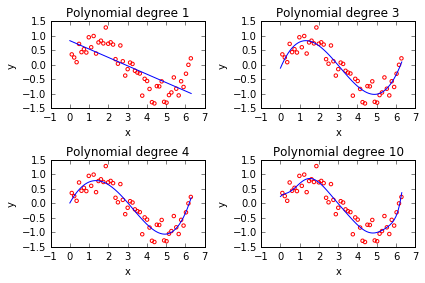

In [21]:
from plots import *

def compute_loss(y, w, fi):
    e = y - np.dot(fi, w)
    mse = np.dot(np.transpose(e),e)/(2*len(y))
    return np.sqrt(2*mse)

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 4, 10]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        tr = np.transpose(poly)
        wMLS = np.dot(np.dot(np.linalg.inv(np.dot(tr, poly)),tr),y)
        rmse=compute_loss(y, wMLS, poly)

        weight = wMLS
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [22]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    #train_set = (np.random.rand(int(len(x)*ratio))*len(x))
    #np.random.shuffle(x)
    mid = np.transpose(np.vstack((x,y)))
    np.random.shuffle(mid)
    x_ = mid[:,0]
    y_ = mid[:,1]
    x_train, x_test = x_[:int(len(x)*ratio)], x_[int(len(x)*ratio):]
    y_train, y_test = y_[:int(len(y)*ratio)], y_[int(len(y)*ratio):]
    return x_train, y_train, x_test, y_test

Then, test your `split_data` function below.

In [23]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_poly = build_poly(x_train,degree)
    test_poly = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    tr = np.transpose(train_poly)
    wMLS = np.dot(np.dot(np.linalg.inv(np.dot(tr, train_poly)),tr),y_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = compute_loss(y_train, wMLS, train_poly)
    rmse_te = compute_loss(y_test, wMLS, test_poly)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 10]
split_ratios = [1, 0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=1, degree=1, Training RMSE=0.472, Testing RMSE=nan
proportion=1, degree=3, Training RMSE=0.259, Testing RMSE=nan
proportion=1, degree=7, Training RMSE=0.250, Testing RMSE=nan
proportion=1, degree=10, Training RMSE=0.248, Testing RMSE=nan
proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=10, Training RMSE=0.252, Testing RMSE=0.220
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=10, Training RMSE=0.218, Testing RMSE=1.605
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=3.832, Testing RMSE=3.342
proportion=0.1, degree=

/home/nikita/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


# Ridge Regression
Please fill in the function below.

In [24]:
def ridge_regression(y, tx, lamb):
    a,b = tx.shape
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    tr = np.transpose(tx)
    return np.dot(np.dot(np.linalg.inv(np.dot(tr,tx)+lamb*2*a*np.identity(b)),tr),y)

In [26]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)  
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_poly = build_poly(x_train,degree)
    test_poly = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    for lam in lambdas:
        w = ridge_regression(y_train, train_poly, lam)
        rmse_tr = compute_loss(y_train, w, train_poly)
        rmse_te = compute_loss(y_test, w, test_poly)
        print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}, lam={l}".format(
              p=ratio, d=degree, tr=rmse_tr, te=rmse_te, l=lam))

seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

proportion=0.5, degree=7, Training RMSE=0.229, Testing RMSE=0.331, lam=0.001
proportion=0.5, degree=7, Training RMSE=0.230, Testing RMSE=0.321, lam=0.0027825594022071257
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.300, lam=0.007742636826811269
proportion=0.5, degree=7, Training RMSE=0.239, Testing RMSE=0.278, lam=0.021544346900318832
proportion=0.5, degree=7, Training RMSE=0.255, Testing RMSE=0.284, lam=0.05994842503189409
proportion=0.5, degree=7, Training RMSE=0.286, Testing RMSE=0.338, lam=0.1668100537200059
proportion=0.5, degree=7, Training RMSE=0.319, Testing RMSE=0.404, lam=0.46415888336127775
proportion=0.5, degree=7, Training RMSE=0.340, Testing RMSE=0.450, lam=1.2915496650148828
proportion=0.5, degree=7, Training RMSE=0.355, Testing RMSE=0.485, lam=3.593813663804626
proportion=0.5, degree=7, Training RMSE=0.373, Testing RMSE=0.516, lam=10.0
